# An introduction to Pytorch

Pytorch is a platform for deep learning in Python. 

It provides tools for efficiently creating, training, testing and analyzing neural networks:

* Different types of layers (embedding, linear, convolutional, recurrent)
* Activation functions (tanh, relu, sigmoid, etc.)
* Gradient computation
* Optimizer (adam, adagrad, RMSprop, SGD, etc.)
* Implementations speed gains in GPU

## Alternatives

Other platforms for deep learning in Python exist, with different focuses: Tensorflow, Caffe, MXNet,...

* Pytorch is comparetively simple to use 
* ... and also the only one besides Tensorflow I have experience with 🙂
* Feel free to try the others!

## Tensors

Let's start with some basics: tensors are similar to numpy arrays

In [2]:
import torch

In [15]:
v1 = torch.arange(10)
v2 = torch.arange(10, 20)

print("v1: %s\n" % v1)
print("v2: %s\n" % v2)
print("Dot product: %d" % v1.dot(v2))

v1: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

v2: tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Dot product: 735


#### Setting values manually or randomly:

In [17]:
v3 = torch.tensor([2, 4, 6, 8])
v4 = torch.rand(10)

print("v3: %s\n" % v3)
print("v4: %s\n" % v4)

v3: tensor([2, 4, 6, 8])

v4: tensor([0.0664, 0.6830, 0.1452, 0.8772, 0.8314, 0.6655, 0.4002, 0.7708, 0.6357,
        0.5712])



#### Accessing values (indexing)

Individual tensor positions are scalars, or 0-dimension tensor:

In [32]:
print(v1[0])
print(v1[0].shape)

tensor(0)
torch.Size([])


`.item()` returns a Python number:

In [34]:
number = v1[0].item()
print(number)
print(isinstance(number, int))

0
True


#### Elementwise operations

In [40]:
v1 + v2

tensor([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [41]:
v1 * v2

tensor([  0,  11,  24,  39,  56,  75,  96, 119, 144, 171])

Some caveats when working with integer values!

In [42]:
v1 / v2 

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
x = torch.tensor(v1, dtype=torch.float)
y = torch.tensor(v2, dtype=torch.float)
x / y

tensor([0.0000, 0.0909, 0.1667, 0.2308, 0.2857, 0.3333, 0.3750, 0.4118, 0.4444,
        0.4737])

#### Operations with constants

In [49]:
x + 1

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [50]:
x ** 2

tensor([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])

#### Matrices

In [52]:
m1 = torch.rand(5, 4)
m2 = torch.rand(4, 5)

print("m1: %s\n" % m1)
print("m2: %s\n" % m2)
print(m1.dot(m2))

m1: tensor([[0.0278, 0.2712, 0.5473, 0.5079],
        [0.8221, 0.4963, 0.5997, 0.4880],
        [0.2818, 0.4507, 0.0010, 0.5877],
        [0.2143, 0.7136, 0.0223, 0.8941],
        [0.0104, 0.0121, 0.3261, 0.2706]])

m2: tensor([[0.9696, 0.5787, 0.4738, 0.7915, 0.9225],
        [0.4666, 0.4923, 0.8645, 0.1778, 0.5621],
        [0.7024, 0.3593, 0.4951, 0.2427, 0.3650],
        [0.3444, 0.4946, 0.1802, 0.5290, 0.3362]])



RuntimeError: dot: Expected 1-D argument self, but got 2-D

Oops... that can be misleading if you are used to numpy. Instead, call `matmul`

In [14]:
print(m1.matmul(m2))

tensor([[47.7465, 46.7010, 45.3850,  ..., 51.4776, 47.2585, 50.0841],
        [49.6474, 48.7152, 46.5042,  ..., 51.9356, 46.6079, 51.4582],
        [50.1498, 44.7873, 44.9264,  ..., 54.2252, 49.8617, 49.3896],
        ...,
        [55.2321, 48.4604, 50.6200,  ..., 56.2640, 51.8299, 55.2649],
        [49.2686, 47.2708, 48.1436,  ..., 52.3073, 49.2061, 51.3510],
        [48.1278, 45.8310, 44.7285,  ..., 51.3708, 46.2172, 48.2655]])


#### Higher order tensors

In [53]:
t = torch.rand(3, 4, 5)
t

tensor([[[0.0642, 0.3668, 0.3214, 0.8915, 0.0877],
         [0.2543, 0.6225, 0.1842, 0.8284, 0.2481],
         [0.6848, 0.4503, 0.4840, 0.1451, 0.3784],
         [0.1366, 0.6467, 0.4412, 0.3390, 0.1710]],

        [[0.6824, 0.6023, 0.2939, 0.9829, 0.7580],
         [0.9866, 0.0821, 0.6001, 0.1648, 0.4621],
         [0.1811, 0.6433, 0.4660, 0.2647, 0.2530],
         [0.9797, 0.9803, 0.1172, 0.3923, 0.1749]],

        [[0.2171, 0.1436, 0.8057, 0.7812, 0.7680],
         [0.8459, 0.9087, 0.5033, 0.7366, 0.1267],
         [0.7720, 0.9474, 0.8448, 0.3019, 0.1885],
         [0.3152, 0.8254, 0.6701, 0.2894, 0.3298]]])

## Broadcasting

Broadcasting means doing some arithmetic operation with tensors of different ranks, as if the smaller one were expanded, or broadcast, to match the larger.

Let's experiment with a matrix (rank 2 tensor) and a vector (rank 1).

In [57]:
m = torch.rand(5, 4)
v = torch.rand(4)

In [67]:
print("m:", m)
print()
print("v:", v)
print()

m_plus_v = m + v
print("m + v:", m_plus_v)

m: tensor([[0.6566, 0.1799, 0.1373, 0.9139],
        [0.0265, 0.7717, 0.9668, 0.5482],
        [0.7359, 0.8454, 0.1696, 0.7714],
        [0.4124, 0.8893, 0.9494, 0.8120],
        [0.2119, 0.1924, 0.9081, 0.2174]])

v: tensor([0.3412, 0.2106, 0.5937, 0.3711])

m + v: tensor([[0.9977, 0.3905, 0.7310, 1.2850],
        [0.3677, 0.9823, 1.5605, 0.9193],
        [1.0770, 1.0560, 0.7633, 1.1425],
        [0.7535, 1.0999, 1.5431, 1.1831],
        [0.5531, 0.4030, 1.5017, 0.5885]])


Let's see row by row

In [68]:
print("m[0] = %s\n" % m[0])
print("v = %s\n" % v)

row_sum = m[0] + v
print("m[0] + v = %s\n" % row_sum)
print("(m + v)[0] = %s" % m_plus_v[0])

m[0] = tensor([0.6566, 0.1799, 0.1373, 0.9139])

v = tensor([0.3412, 0.2106, 0.5937, 0.3711])

m[0] + v = tensor([0.9977, 0.3905, 0.7310, 1.2850])

(m + v)[0] = tensor([0.9977, 0.3905, 0.7310, 1.2850])


We can also reshape tensors

In [70]:
v.shape

torch.Size([4])

In [71]:
v = v.view([2, 2])
v

tensor([[0.3412, 0.2106],
        [0.5937, 0.3711]])

In [77]:
v = v.view([4, 1])
v

tensor([[0.3412],
        [0.2106],
        [0.5937],
        [0.3711]])

Note that shape `[4, 1]` is not broadcastable to match `[5, 4]`!

In [79]:
m + v

RuntimeError: The size of tensor a (5) must match the size of tensor b (4) at non-singleton dimension 0

... but `[1, 4]` is!

In [80]:
v = v.view([1, 4])
m + v

tensor([[0.9977, 0.3905, 0.7310, 1.2850],
        [0.3677, 0.9823, 1.5605, 0.9193],
        [1.0770, 1.0560, 0.7633, 1.1425],
        [0.7535, 1.0999, 1.5431, 1.1831],
        [0.5531, 0.4030, 1.5017, 0.5885]])

## Useful Functions

Pytorch (and other libraries) have many functions that operate on tensors. Let's try some of them and plot the results.

In [83]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as pl

Create a vector x with values from -10 to 10, and intervals of 0.1.

In [108]:
x = torch.arange(-10, 10, 0.1, dtype=torch.float)

The `.numpy()` method converts Pytorch tensors to numpy array. It is necessary to plot with matplotlib.

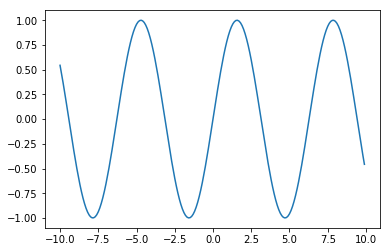

In [109]:
y = x.sin()
pl.plot(x.numpy(), y.numpy())

Hyperbolic tangent

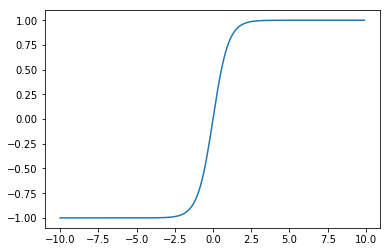

In [111]:
y = x.tanh()
pl.plot(x.numpy(), y.numpy())

$e^x$ 

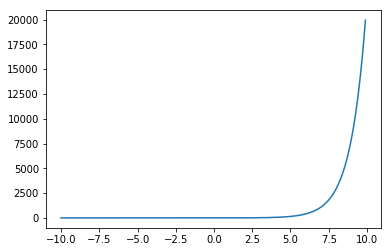

In [123]:
y = torch.exp(x)
pl.plot(x.numpy(), y.numpy())

We can implement softmax. Since it's a function of the whole array, the plot has a slightly different meaning (notice that the y-axis only goes until 0.1)

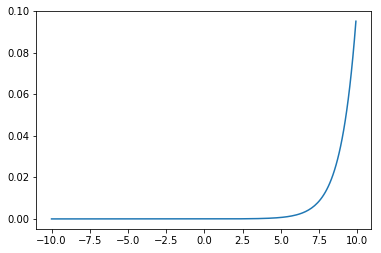

In [116]:
exps = torch.exp(x)
z = exps.sum()
softmax = exps / z
pl.plot(x.numpy(), softmax.numpy())

Anyway, torch also provides an implementation of softmax:

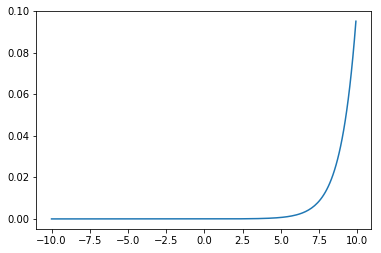

In [122]:
y = torch.softmax(x, dim=0)
pl.plot(x.numpy(), y.numpy())

Let's see the softmax with another x:

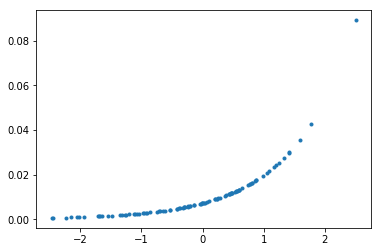

In [133]:
x = torch.randn([100])
y = torch.softmax(x, dim=0)
pl.plot(x.numpy(), y.numpy(), '.')